In [5]:
from numpy.random import randint
def pq_classical_game(strategy):
     """Plays the PQ Penny Flip game
     Args:
     strategy (callable): A function that takes three bits (as `int`s) and
     returns one bit (also as `int`s). The strategy must follow the
     rules of the PQ Penny Flip game.
     Initial state of coin: 0 (Heads - up)
     Q chooses to flip or no-flip.
     P chooses to flip or no-flip.
     Q chooses to flip or no-flip.
     Returns:
     int: 1 for a Q win, 0 for a P win
     """
     
     # P and Q chooses to flip = 1 or no-flip = 0 randomly
     q1, p, q2 = randint(0, 2), randint(0, 2), randint(0, 2)
     # Use strategy to choose a 
     a = strategy(q1,p,q2)
     # Referee opens the box, if coin heads up the Q wins, else P wins
     if a==0:
         return 1 # Q wins
     return 0 # P wins
def classical_strategy(q1, p, q2):
 """An optimal classical strategy for the PQ Penny Flip game
 Args:
 x (int): P's choice (must be 0 or 1)
 Returns:
 (int): 1 for a Tail, 0 for a Head (result of Q's drawing) 
(respectively)
Initial State = 0 (Heads)
 """
 # Result after Q's decision
 if q1 == 0:
     a = 0
 elif q1 == 1:
     a = 1
 # Result after P's decision
 if p == 0:
     a = a
 elif p == 1:
     a = 1 - a
 # Result after Q's decision
 if q2 == 0:
     a = a
 elif q2 == 1:
     a = 1 - a
 return a

In [9]:
NUM_GAMES = 1000
TOTAL_SCORE = 0
for _ in range(NUM_GAMES): 
    TOTAL_SCORE += pq_classical_game(classical_strategy)
print("Fraction of games won by Q:", TOTAL_SCORE / NUM_GAMES)
print("Fraction of games won by P:", 1 - (TOTAL_SCORE / NUM_GAMES))
print("The game is fair to both players in classical version")

Fraction of games won by Q: 0.494
Fraction of games won by P: 0.506
The game is fair to both players in classical version


In [10]:
#Quantized PQ game
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from numpy import pi
from numpy.random import randint
from numpy.random import randint
def pq_quantized_game(strategy):
     """Plays the PQ Penny Flip game
     Args:
     strategy (callable): A function that takes one bit (as `int`s) and
     returns one bit (also as `int`s). The strategy must follow the
     rules of the PQ Penny Flip game.
     Initial state of coin: 0 (Heads - up)
     Q chooses to flip or no-flip. (Always : H gate)
     P chooses to flip or no-flip. (flip = X gate and no-flip = I)
     Q chooses to flip or no-flip. (Always : H gate)
     Returns:
     int: 1 for a Q win, 0 for a P win
     """
     
     # P and Q chooses to flip = 1 or no-flip = 0 randomly
     p = randint(0, 2)
     # Use strategy to choose a 
     a = strategy(p)
     # Referee opens the box, if coin heads up the Q wins, else P wins
     if a==0:
         return 1 # Q wins
     return 0 # P wins


(p = 0)


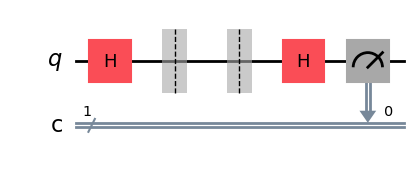

(p = 1)


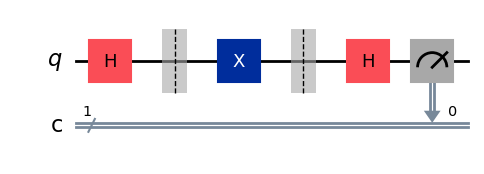

In [11]:
def pq_circuit(p):
    """Creates a `QuantumCircuit` that implements the best CHSH strategy.
    Args:
    p (int): P's decision (must be 0 or 1)
    Returns:
    QuantumCircuit: Circuit that, when run, returns Alice and Bob's
    answer bits.
    """
    qc = QuantumCircuit(1, 1)
    qc.h(0) #Q always apply H gate
    #qc.cx(0, 1)
    qc.barrier()
    # P's decision to flip or no-flip
    # Flip = X gate and no-flip= I 
    if p == 1:
        qc.x(0)
    qc.barrier()
    qc.h(0) #Q always apply H gate
    qc.measure(0, 0)
    return qc
# Draw the two possible circuits
print("(p = 0)")
display(pq_circuit(0).draw('mpl'))
print("(p = 1)")
display(pq_circuit(1).draw('mpl'))

In [12]:
sampler = Sampler()
def quantum_strategy(p):
    """Carry out the best strategy for the PQ Penny Flip game.
    Args:
    p (int): P's decision bit (must be 0 or 1)
    Returns:
    (int): status bits (0 for heads, 1 for tail)
    """
    # `shots=1` runs the circuit once
    result = sampler.run(pq_circuit(p), shots=1).result()
    statistics = result.quasi_dists[0].binary_probabilities()
    bits = list(statistics.keys())[0]
    a = int(bits[0])
    return a
NUM_GAMES = 1000
TOTAL_SCORE = 0
for _ in range(NUM_GAMES):
    TOTAL_SCORE += pq_quantized_game(quantum_strategy)
print("Fraction of games won by Q:", TOTAL_SCORE / NUM_GAMES)
print("Fraction of games won by P:", 1 - (TOTAL_SCORE / NUM_GAMES))
print("Thus the game has been made unfair to P as Q always wins with Quantized Strategy")

Fraction of games won by Q: 1.0
Fraction of games won by P: 0.0
Thus the game has been made unfair to P as Q always wins with Quantized Strategy


In [13]:
#Create a function to swap elements in tuple
#May be used in later stages
def swap_elements(tup, idx1, idx2):
    lst = list(tup)
    lst[idx1], lst[idx2] = lst[idx2], lst[idx1]
    return tuple(lst)

# Example usage:
my_tuple = (1, 2, 3)
new_tuple = swap_elements(my_tuple, 1, 2)
print(new_tuple) 

(1, 3, 2)


In [14]:
from numpy.random import randint
def card_classical_game(strategy):
     """Alice and Bob Plays the Classical Card game
     Args:
     strategy (callable): A function that takes three bits (as `int`s) and
     returns one bit (also as `int`s). The strategy must follow the
     rules of the Classical Card Game.
     Three cards:
     S has star on both side. (0)
     D has diamond on both side. (1)
     M has star on one side and diamond on other side. (2)
     Alice puts it in a black box and shakes it.
     Bob randomly draws a card.
     If that card has same marking on both side Alice wins, otherwise Bob.
     Returns:
     int: 1 for a Bob win, 0 for a Alice win
     """
     #Box with three cards
     s, d, m = 0, 1, 2
     # Use strategy to choose a 
     a, b, c = strategy(s,d,m)
     # Bob randomly picks a card after Alice shakes it
     lst = (a, b, c)
     d = randint(0, 3)
     tpl = list(lst)
     if tpl[d]==2: #If different on both sides
         return 1 # Bob wins
     return 0 # Alice wins

In [15]:
def classical_strategy(s, d, m):
 """An optimal classical strategy for the Alice and Bob Classical card game
 Args:
 s (int): denoted by 0
 d (int): denoted by 1
 m (int): denoted by 2
 Returns:
 (int, int, int): Randomly swaps the elements resembles shaking of the box
 """
 id1 = randint(0, 3)
 id2 = randint(0, 3)
 a, b, c = swap_elements((s, d, m), id1, id2) #Shakes the black box
 return a, b, c

In [16]:
NUM_GAMES = 1000
TOTAL_SCORE = 0
for _ in range(NUM_GAMES): 
    TOTAL_SCORE += card_classical_game(classical_strategy)
print("Fraction of games won by Bob:", TOTAL_SCORE / NUM_GAMES)
print("Fraction of games won by Alice:", 1 - (TOTAL_SCORE / NUM_GAMES))
print("The Game is biased Bob with winning probability of 1/3")

Fraction of games won by Bob: 0.321
Fraction of games won by Alice: 0.679
The Game is biased Bob with winning probability of 1/3


In [17]:
#Quantized Alice and Bob Card game
from numpy.random import randint
def card_quantized_game(strategy):
     """Alice and Bob Plays the Classical Card game
     Args:
     strategy (callable): A function that takes three bits (as `int`s) and
     returns one bit (also as `int`s). The strategy must follow the
     rules of the Classical Card Game.
     Three cards:
     S has star on both side. (0)
     D has diamond on both side. (1)
     M has star on one side and diamond on other side. (2)
     Alice puts it in a black box and shakes it.
     Bob randomly draws a card.
     If that card has same marking on both side Alice wins, otherwise Bob.
     Returns:
     int: 1 for a Alice and Bob wins 50%, 0 for Bob quit
     """
     #Box with three cards
     s, d, m = 0, 1, randint(0, 2)
     # Use strategy to choose a 
     a, b, c = strategy(s,d,m)
     # Bob randomly picks a card after Alice shakes it
     lst = (a, b, c)
     d = randint(0, 3)
     tpl = list(lst)
     if (m==0) & (tpl[d]==0): #Randomly picks the card
         return 1 # Bob has 50% chance of winning
     elif (m==1) & (tpl[d]==1): #Randomly picks the card
         return 1 # Bob has 50% chance of winning
     return 0; #Bob quits

(s,d,m) = (0,0,0)


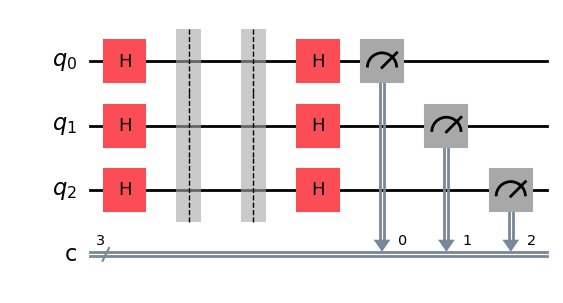

(s,d,m) = (1,1,1)


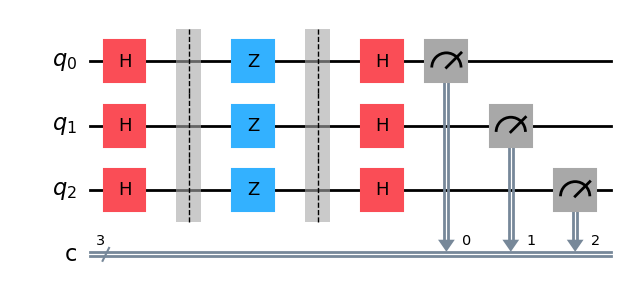

In [18]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from numpy import pi
from numpy.random import randint
def card_circuit(s, d, m):
    """Creates a `QuantumCircuit` that implements the best CHSH strategy.
    Args:
    s, d, m (int, int, int): Three Cards 
    Returns:
    QuantumCircuit: Circuit that, when run, returns Alice and Bob's
    answer bits.
    """
    qc = QuantumCircuit(3, 3)
    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.barrier()
    if s == 1:
        qc.z(0)
    if d == 1:
        qc.z(1)
    if m == 1:
        qc.z(2)
    qc.barrier()
    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.measure(0, 0) #query for 1st card
    qc.measure(1, 1) #query for 2nd card
    qc.measure(2, 2) #query for 3rd card 
    return qc
# Draw the few possible circuits
print("(s,d,m) = (0,0,0)")
display(card_circuit(0, 0, 0).draw('mpl'))
print("(s,d,m) = (1,1,1)")
display(card_circuit(1, 1, 1).draw('mpl'))

In [19]:
sampler = Sampler()
def quantum_strategy(s, d, m):
    """An optimal classical strategy for the Alice and Bob Classical card game
    Args:
    s (int): denoted by 0
    d (int): denoted by 1
    m (int): denoted by 2
    Returns:
    (int, int, int): Randomly swaps the elements resembles shaking of the box
    """
    id1 = randint(0, 3)
    id2 = randint(0, 3)
    a1, b1, c1 = swap_elements((s, d, m), id1, id2) #Shakes the black box
    # `shots=1` runs the circuit once
    result = sampler.run(card_circuit(a1, b1, c1), shots=1).result()
    statistics = result.quasi_dists[0].binary_probabilities()
    bits = list(statistics.keys())[0]
    a, b, c = int(bits[0]), int(bits[1]), int(bits[2]) #quantum querry
    return a, b, c

In [20]:
NUM_GAMES = 1000
TOTAL_SCORE = 0
GAMES_PLAYED = 0
for _ in range(NUM_GAMES):
    value=card_quantized_game(quantum_strategy)
    if value==1:
        GAMES_PLAYED += 1 #Games that Bob did not quit
        TOTAL_SCORE += value
print("Fraction of games won by Bob:", (TOTAL_SCORE / GAMES_PLAYED)/2) #Divide by 2 for 50% chance
print("Fraction of games won by Alice:", 1 - (TOTAL_SCORE / GAMES_PLAYED)/2)
print("Thus the game has been made fair to both")

Fraction of games won by Bob: 0.5
Fraction of games won by Alice: 0.5
Thus the game has been made fair to both
